### Import All neccessary Library

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modellling

from sklearn.metrics  import mean_squared_error  , r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics  import r2_score , mean_absolute_error 
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("data/stud.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [7]:
X = df.drop(columns = ['math_score'] ,axis = 1)

y = df['math_score']

In [8]:
print("Categories in gender variable : ",df['gender'].unique())
print("Categories in race_ethnicity variable : ",df['race_ethnicity'].unique())
print("Categories in parental_level_of_education variable : ",df['parental_level_of_education'].unique())
print("Categories in lunch variable : ",df['lunch'].unique())
print("Categories in test_preparation_course variable : ",df['test_preparation_course'].unique())

Categories in gender variable :  ['female' 'male']
Categories in race_ethnicity variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable :  ['standard' 'free/reduced']
Categories in test_preparation_course variable :  ['none' 'completed']


In [9]:
# Create Column Transformer with 3 type of Transformation

num_features = X.select_dtypes(exclude="object").columns 

cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler 

from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()

oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
            [
                ("OneHotEncoder",oh_transformer,cat_features) ,
                ("StandardScalar",numeric_transformer , num_features)
            ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,random_state=43)
print(X_train.shape , X_test.shape)

(800, 19) (200, 19)


### Create an Evaluate Function to give all metrics after model training

In [13]:
def evaluate_model(true , predicted):
    
    mae = mean_absolute_error(true , predicted)
    
    mse = mean_squared_error(true , predicted)
    
    rmse = np.sqrt(mean_squared_error(true, predicted))
    
    r2_squared = r2_score(true , predicted)
    
    return mae , rmse , r2_squared 

In [19]:
#Model 

models = {
    
    "Linear Regression:" : LinearRegression() , 
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor() ,
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
}

model_list = []

r2_list = []

for i in range(len(list(models))):
    
    model = list(models.values())[i]
    
    model.fit(X_train,y_train) # Train model
    
    #Make Prediction
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluate Train and test  dataset
    
    model_train_mae  , model_train_rmse , model_train_r2 = evaluate_model(y_train , y_train_pred)
    
    model_test_mae  , model_test_rmse , model_test_r2 = evaluate_model(y_test , y_test_pred)
    
    print(list(models.keys())[i])
    
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse) )
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse) )
    print("- R2 Score :{:.4f}".format(model_train_r2))
    
    print('-------------------------------------------')
    
    print("Model performance for Test set")
    
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse) )
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse) )
    print("- R2 Score :{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("=============================================================================")
    

Linear Regression:
Model performance for Training set
- Root Mean Squared Error : 5.3110
- Root Mean Squared Error : 5.3110
- R2 Score :0.8774
-------------------------------------------
Model performance for Test set
- Root Mean Squared Error : 5.3986
- Root Mean Squared Error : 5.3986
- R2 Score :0.8704
Lasso
Model performance for Training set
- Root Mean Squared Error : 6.5415
- Root Mean Squared Error : 6.5415
- R2 Score :0.8139
-------------------------------------------
Model performance for Test set
- Root Mean Squared Error : 6.8436
- Root Mean Squared Error : 6.8436
- R2 Score :0.7917
Ridge
Model performance for Training set
- Root Mean Squared Error : 5.3113
- Root Mean Squared Error : 5.3113
- R2 Score :0.8773
-------------------------------------------
Model performance for Test set
- Root Mean Squared Error : 5.4014
- Root Mean Squared Error : 5.4014
- R2 Score :0.8703
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error : 6.0359
- Root Mean S

342:	learn: 4.2892240	total: 209ms	remaining: 400ms
343:	learn: 4.2855784	total: 210ms	remaining: 400ms
344:	learn: 4.2818005	total: 210ms	remaining: 399ms
345:	learn: 4.2810097	total: 211ms	remaining: 399ms
346:	learn: 4.2796126	total: 212ms	remaining: 398ms
347:	learn: 4.2753444	total: 212ms	remaining: 397ms
348:	learn: 4.2729628	total: 213ms	remaining: 397ms
349:	learn: 4.2702461	total: 213ms	remaining: 396ms
350:	learn: 4.2686641	total: 214ms	remaining: 395ms
351:	learn: 4.2656856	total: 214ms	remaining: 395ms
352:	learn: 4.2639283	total: 215ms	remaining: 394ms
353:	learn: 4.2609888	total: 215ms	remaining: 393ms
354:	learn: 4.2597546	total: 216ms	remaining: 393ms
355:	learn: 4.2554749	total: 217ms	remaining: 392ms
356:	learn: 4.2516630	total: 217ms	remaining: 391ms
357:	learn: 4.2460443	total: 218ms	remaining: 391ms
358:	learn: 4.2434795	total: 218ms	remaining: 390ms
359:	learn: 4.2376576	total: 219ms	remaining: 389ms
360:	learn: 4.2369013	total: 220ms	remaining: 389ms
361:	learn: 

570:	learn: 3.7411447	total: 343ms	remaining: 258ms
571:	learn: 3.7391330	total: 344ms	remaining: 257ms
572:	learn: 3.7382269	total: 345ms	remaining: 257ms
573:	learn: 3.7346442	total: 345ms	remaining: 256ms
574:	learn: 3.7323143	total: 346ms	remaining: 256ms
575:	learn: 3.7283712	total: 346ms	remaining: 255ms
576:	learn: 3.7273638	total: 347ms	remaining: 254ms
577:	learn: 3.7244835	total: 348ms	remaining: 254ms
578:	learn: 3.7229126	total: 348ms	remaining: 253ms
579:	learn: 3.7210135	total: 349ms	remaining: 253ms
580:	learn: 3.7186189	total: 349ms	remaining: 252ms
581:	learn: 3.7177432	total: 350ms	remaining: 251ms
582:	learn: 3.7160205	total: 350ms	remaining: 251ms
583:	learn: 3.7131398	total: 351ms	remaining: 250ms
584:	learn: 3.7116883	total: 352ms	remaining: 249ms
585:	learn: 3.7107802	total: 352ms	remaining: 249ms
586:	learn: 3.7092114	total: 353ms	remaining: 248ms
587:	learn: 3.7076580	total: 354ms	remaining: 248ms
588:	learn: 3.7052852	total: 354ms	remaining: 247ms
589:	learn: 

797:	learn: 3.3480715	total: 483ms	remaining: 122ms
798:	learn: 3.3458611	total: 484ms	remaining: 122ms
799:	learn: 3.3428585	total: 485ms	remaining: 121ms
800:	learn: 3.3407410	total: 485ms	remaining: 121ms
801:	learn: 3.3388409	total: 486ms	remaining: 120ms
802:	learn: 3.3371982	total: 486ms	remaining: 119ms
803:	learn: 3.3345374	total: 487ms	remaining: 119ms
804:	learn: 3.3334787	total: 487ms	remaining: 118ms
805:	learn: 3.3318516	total: 488ms	remaining: 117ms
806:	learn: 3.3288764	total: 489ms	remaining: 117ms
807:	learn: 3.3278302	total: 489ms	remaining: 116ms
808:	learn: 3.3256825	total: 490ms	remaining: 116ms
809:	learn: 3.3251622	total: 490ms	remaining: 115ms
810:	learn: 3.3241938	total: 491ms	remaining: 114ms
811:	learn: 3.3218246	total: 492ms	remaining: 114ms
812:	learn: 3.3196615	total: 493ms	remaining: 113ms
813:	learn: 3.3182109	total: 493ms	remaining: 113ms
814:	learn: 3.3164669	total: 494ms	remaining: 112ms
815:	learn: 3.3141605	total: 495ms	remaining: 112ms
816:	learn: 

CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error : 3.0279
- Root Mean Squared Error : 3.0279
- R2 Score :0.9601
-------------------------------------------
Model performance for Test set
- Root Mean Squared Error : 5.8142
- Root Mean Squared Error : 5.8142
- R2 Score :0.8497
AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error : 5.7594
- Root Mean Squared Error : 5.7594
- R2 Score :0.8558
-------------------------------------------
Model performance for Test set
- Root Mean Squared Error : 6.2126
- Root Mean Squared Error : 6.2126
- R2 Score :0.8284


In [20]:
pd.DataFrame(list(zip(model_list ,r2_list)) , columns = ['model Name', "R2 Score"]).sort_values(by=["R2 Score"] ,ascending = False)

,model Name,R2 Score
0,Linear Regression:,0.870392
2,Ridge,0.870260
7,CatBoosting Regressor,0.849671
5,Random Forest Regressor,0.843847
8,AdaBoost Regressor,0.828362
6,XGBRegressor,0.821092
1,Lasso,0.791725
3,K-Neighbors Regressor,0.790315
4,Decision Tree,0.750480


### Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train , y_train)
y_pred = lin_model.predict(X_test)

score = r2_score(y_test , y_pred) * 100
print("Accuracy of the model is %.2f "%score)

Accuracy of the model is 87.04 


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

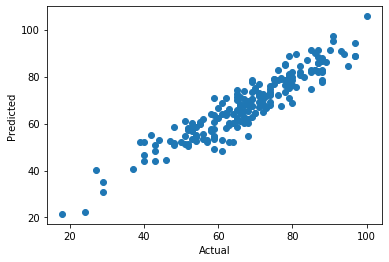

In [22]:
plt.scatter(y_test , y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

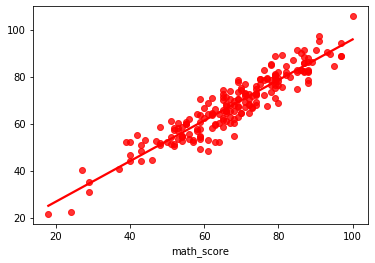

In [23]:
sns.regplot(x=y_test , y= y_pred , ci = None, color = "red")

### Difference Between Actual and Predicted Values

In [24]:
pred_df = pd.DataFrame({"Actual Value":y_test,"Predicted Values":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted Values,Difference
858,52,51.114625,0.885375
986,40,46.520975,-6.520975
183,65,62.219553,2.780447
502,63,60.038781,2.961219
710,93,90.678830,2.321170
...,...,...,...
27,67,65.489881,1.510119
244,75,76.925242,-1.925242
294,78,78.654367,-0.654367
176,46,44.655158,1.344842
